# PROJECT 3 COMPUTER VISION

- Joanna Szczublińska 156070
- Wiktoria Szarzyńska 156058

### `Step 1: Choose the dataset and convert images into Lab channels.`

In [42]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from tensorflow.keras.callbacks import EarlyStopping
from skimage.metrics import structural_similarity as ssim
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
import pandas as pd
from tabulate import tabulate
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
import random
from sklearn.model_selection import KFold
from skimage.color import lab2rgb

In [2]:
data_dir = "flowers"

In [3]:
classes = os.listdir(data_dir)
print(classes)

['daisy']


In [99]:
X_l = []
Y_ab = []
labels = []

for label, class_name in enumerate(classes):
    class_path = os.path.join(data_dir, class_name)
    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)

            img = cv2.imread(img_path)


            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

                img = cv2.resize(img, (200, 200))
                
                lab  = cv2.cvtColor(img, cv2.COLOR_RGB2Lab)

                l_channel = lab[:, :, 0]
                ab_channels = lab[:, :, 1:]

                l_channel = l_channel / 255.0  # Kanał L w zakresie [0, 1]
                ab_channels = ab_channels / 128.0  # a, b w zakresie [-1, 1]

                # Dodanie do list
                X_l.append(l_channel)
                Y_ab.append(ab_channels)
                labels.append(label)

In [113]:
X_l = np.array(X_l, dtype=np.float32).reshape(-1, 200, 200, 1)  # dimensions to be the same for X and Y
Y_ab = np.array(Y_ab, dtype=np.float32)  # Kanały a i b

print(X_l.shape)
print(Y_ab.shape)

labels = np.array(labels)

(764, 200, 200, 1)
(764, 200, 200, 2)


In [101]:
X_train, X_temp, Y_train, Y_temp = train_test_split(X_l, Y_ab, test_size=0.3, random_state=42) #70% for training and 30% for temporary dataset
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42) #50% for validation and 50% for testing

In [102]:
print(f"#Training set: {len(X_train)}")
print(f"#Validation set: {len(X_val)}")
print(f"#Test set: {len(X_test)}")

#Training set: 534
#Validation set: 115
#Test set: 115


C:\Users\rober\AppData\Local\Temp\ipykernel_17512\1820919593.py:8: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 32750 negative Z values that have been clipped to zero
  example_rgb = lab2rgb(example_lab)  # Konwersja Lab -> RGB


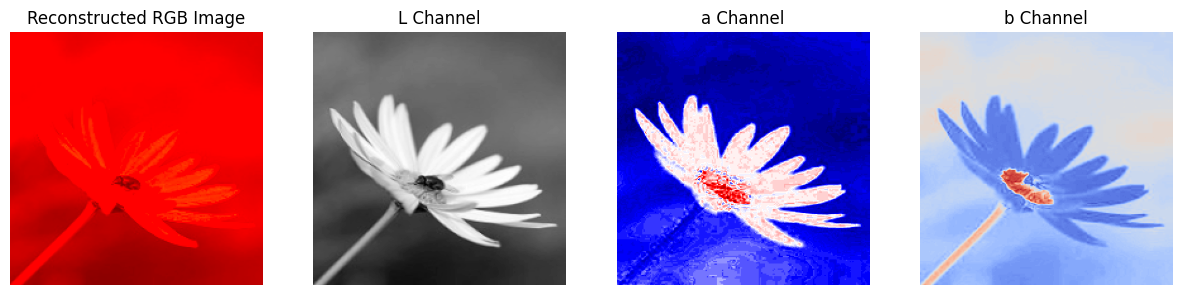

In [103]:
example_l = X_train[0].squeeze()  # Kanał L
example_ab = Y_train[0]  # Kanały a i b

# Połączenie kanału L z kanałami a i b dla pełnego obrazu RGB
example_lab = np.zeros((200, 200, 3))  # Tworzenie pustego obrazu Lab
example_lab[:, :, 0] = example_l * 100  # Skalowanie L z [0, 1] do [0, 100]
example_lab[:, :, 1:] = example_ab * 128  # Skalowanie a, b z [-1, 1] do [-128, 128]
example_rgb = lab2rgb(example_lab)  # Konwersja Lab -> RGB

# Wizualizacja
plt.figure(figsize=(15, 5))

# Oryginalny obraz (odtworzony z kanałów L, a, b)
plt.subplot(1, 4, 1)
plt.title("Reconstructed RGB Image")
plt.imshow(example_rgb)
plt.axis("off")

# Kanał L (jasność)
plt.subplot(1, 4, 2)
plt.title("L Channel")
plt.imshow(example_l, cmap="gray")
plt.axis("off")

# Kanał a
plt.subplot(1, 4, 3)
plt.title("a Channel")
plt.imshow(example_ab[:, :, 0], cmap="seismic")  # Wizualizacja kanału a
plt.axis("off")

# Kanał b
plt.subplot(1, 4, 4)
plt.title("b Channel")
plt.imshow(example_ab[:, :, 1], cmap="coolwarm")  # Wizualizacja kanału b
plt.axis("off")

plt.show()


C:\Users\rober\AppData\Local\Temp\ipykernel_17512\2021234284.py:8: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 33339 negative Z values that have been clipped to zero
  example_rgb = lab2rgb(example_lab)


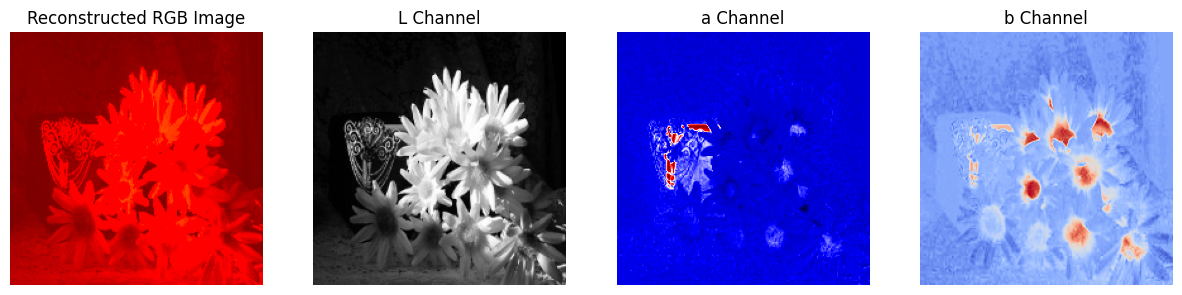

In [104]:
example_l = X_train[1].squeeze()  # Kanał L
example_ab = Y_train[1]  # Kanały a i b


example_lab = np.zeros((200, 200, 3))  
example_lab[:, :, 0] = example_l * 100  
example_lab[:, :, 1:] = example_ab * 128  
example_rgb = lab2rgb(example_lab)  

plt.figure(figsize=(15, 5))


plt.subplot(1, 4, 1)
plt.title("Reconstructed RGB Image")
plt.imshow(example_rgb)
plt.axis("off")

plt.subplot(1, 4, 2)
plt.title("L Channel")
plt.imshow(example_l, cmap="gray")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.title("a Channel")
plt.imshow(example_ab[:, :, 0], cmap="seismic")  # Wizualizacja kanału a
plt.axis("off")

plt.subplot(1, 4, 4)
plt.title("b Channel")
plt.imshow(example_ab[:, :, 1], cmap="coolwarm")  # Wizualizacja kanału b
plt.axis("off")

plt.show()



C:\Users\rober\AppData\Local\Temp\ipykernel_17512\1918306211.py:8: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 30707 negative Z values that have been clipped to zero
  example_rgb = lab2rgb(example_lab)


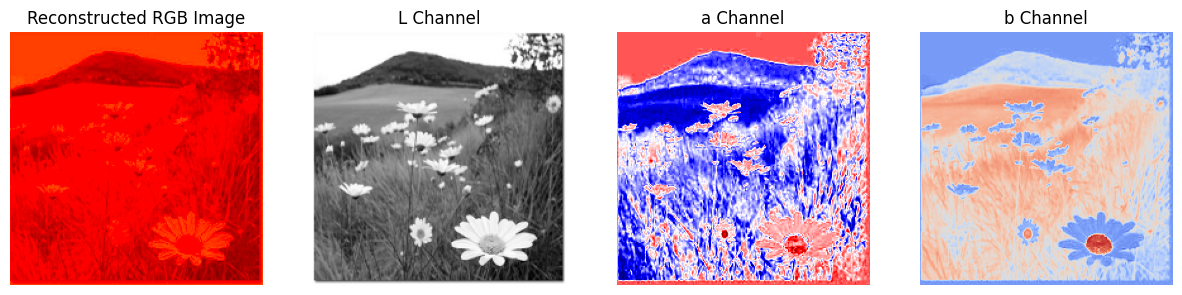

In [105]:
example_l = X_train[3].squeeze()  # Kanał L
example_ab = Y_train[3]  # Kanały a i b


example_lab = np.zeros((200, 200, 3))  
example_lab[:, :, 0] = example_l * 100  
example_lab[:, :, 1:] = example_ab * 128  
example_rgb = lab2rgb(example_lab)  

plt.figure(figsize=(15, 5))


plt.subplot(1, 4, 1)
plt.title("Reconstructed RGB Image")
plt.imshow(example_rgb)
plt.axis("off")

plt.subplot(1, 4, 2)
plt.title("L Channel")
plt.imshow(example_l, cmap="gray")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.title("a Channel")
plt.imshow(example_ab[:, :, 0], cmap="seismic")  # Wizualizacja kanału a
plt.axis("off")

plt.subplot(1, 4, 4)
plt.title("b Channel")
plt.imshow(example_ab[:, :, 1], cmap="coolwarm")  # Wizualizacja kanału b
plt.axis("off")

plt.show()



### `Step 2: Model, ready architecture trained from scratch.`

#### `Step 2.1 Autoencoder.`

In [60]:
input_shape = (200, 200, 1)

# ENCODER
def build_encoder(input_layer):
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    return x

# DECODER
def build_decoder(encoded_layer):
    x = Conv2DTranspose(256, (3, 3), activation='relu', padding='same')(encoded_layer)
    x = UpSampling2D((2, 2))(x)
    x = Conv2DTranspose(128, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    output_layer = Conv2D(2, (3, 3), activation='linear', padding='same')(x)  S
    return output_layer

In [61]:
input_layer = Input(shape=input_shape)
encoded = build_encoder(input_layer)
decoded = build_decoder(encoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

autoencoder.summary()

Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_15 (InputLayer)     │ (None, 200, 200, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_60 (Conv2D)              │ (None, 200, 200, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_45 (MaxPooling2D) │ (None, 100, 100, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 100, 100, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_46 (MaxPooling2D) │ (None, 50, 50, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_62 (Conv2D)              │ (None, 50, 50, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_47 (MaxPooling2D) │ (None, 25, 25, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_45             │ (None, 25, 25, 256)    │       590,080 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_45 (UpSampling2D) │ (None, 50, 50, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_46             │ (None, 50, 50, 128)    │       295,040 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_46 (UpSampling2D) │ (None, 100, 100, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_47             │ (None, 100, 100, 64)   │        73,792 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_47 (UpSampling2D) │ (None, 200, 200, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_63 (Conv2D)              │ (None, 200, 200, 2)    │         1,154 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,329,730 (5.07 MB)

 Trainable params: 1,329,730 (5.07 MB)

 Non-trainable params: 0 (0.00 B)

#### `Step 2.2: U-net.`

### `Step 3: Initial model training.`

#### `Step 3.1: Autoencoder.`

In [13]:
early_stopping = EarlyStopping(monitor = 'val_loss', patience=5, restore_best_weights=True)

In [64]:
def psnr_metric(y_true, y_pred):
    return tf.image.psnr(y_true, y_pred, max_val=1.0)

In [65]:
def ssim_metric(y_true, y_pred):
    return tf.image.ssim(y_true, y_pred, max_val=1.0)

In [66]:
autoencoder.compile(
    optimizer='adam',
    loss='mse',  
    metrics=[psnr_metric, ssim_metric]  
)

In [ ]:
batch_size = 32
epochs = 30

history = autoencoder.fit(
    X_train, Y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_data = (X_val, Y_val),
    callbacks = [early_stopping]
)

val_results = autoencoder.evaluate(X_val, Y_val)
print(f"Validation Loss: {val_results[0]:.4f}, PSNR: {val_results[1]:.4f}, SSIM: {val_results[2]:.4f}")

Epoch 1/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 58s 3s/step - loss: 0.8555 - psnr_metric: 0.8665 - ssim_metric: 0.1776 - val_loss: 0.7933 - val_psnr_metric: 1.0611 - val_ssim_metric: 0.1747
Epoch 2/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 52s 3s/step - loss: 0.7947 - psnr_metric: 1.0419 - ssim_metric: 0.1868 - val_loss: 0.7988 - val_psnr_metric: 1.0132 - val_ssim_metric: 0.1747
Epoch 3/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 50s 3s/step - loss: 0.8124 - psnr_metric: 0.9283 - ssim_metric: 0.1855 - val_loss: 0.7940 - val_psnr_metric: 1.0584 - val_ssim_metric: 0.1756
Epoch 4/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 51s 3s/step - loss: 0.8120 - psnr_metric: 0.9347 - ssim_metric: 0.1861 - val_loss: 0.7920 - val_psnr_metric: 1.0713 - val_ssim_metric: 0.1746
Epoch 5/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 53s 3s/step - loss: 0.8071 - psnr_metric: 0.9707 - ssim_metric: 0.1797 - val_loss: 0.7936 - val_psnr_metric: 1.0601 - val_ssim_metric: 0.1748
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 620ms/step - loss: 0.7932 - psnr_metric: 1.0560 - ssim_metric: 0.1729
Validat

In [68]:
test_results = autoencoder.evaluate(X_test, Y_test)
print(f"Test Loss: {test_results[0]:.4f}, PSNR: {test_results[1]:.4f}, SSIM: {test_results[2]:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 621ms/step - loss: 0.8086 - psnr_metric: 0.9670 - ssim_metric: 0.1724
Test Loss: 0.8082, PSNR: 0.9669, SSIM: 0.1775


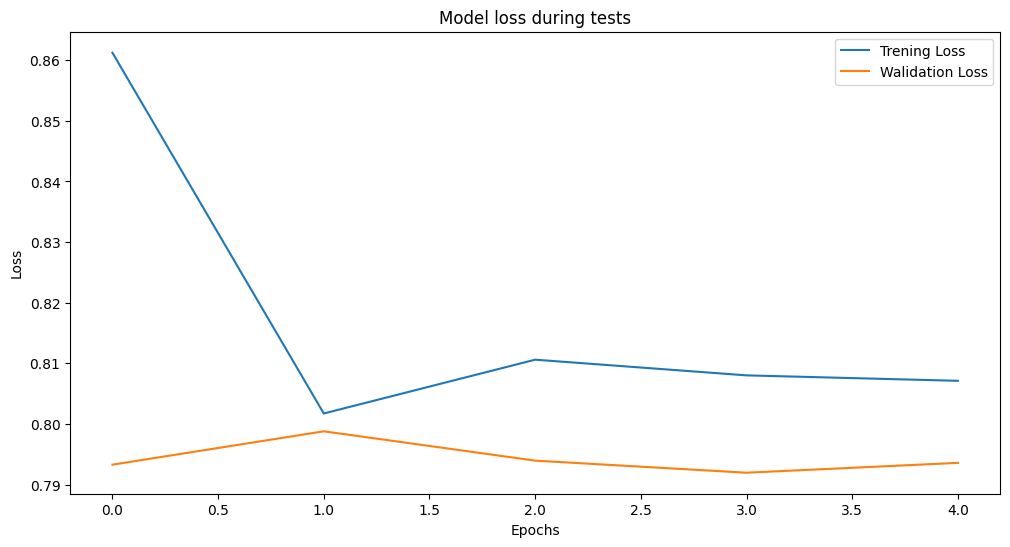

In [112]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Trening Loss')
plt.plot(history.history['val_loss'], label='Walidation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model loss during tests')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


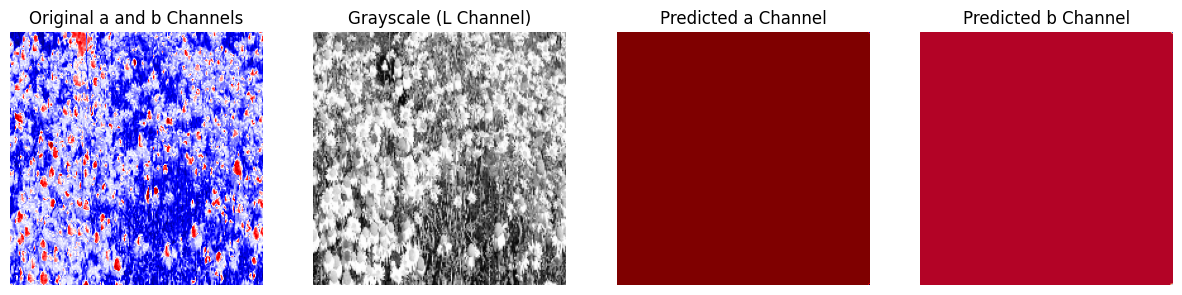

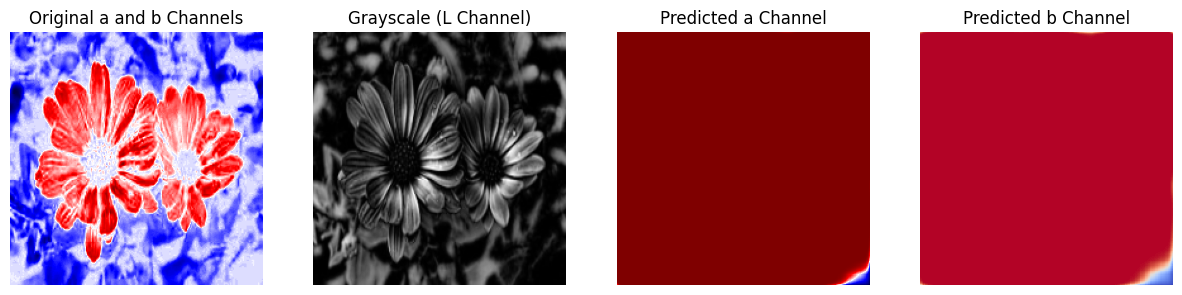

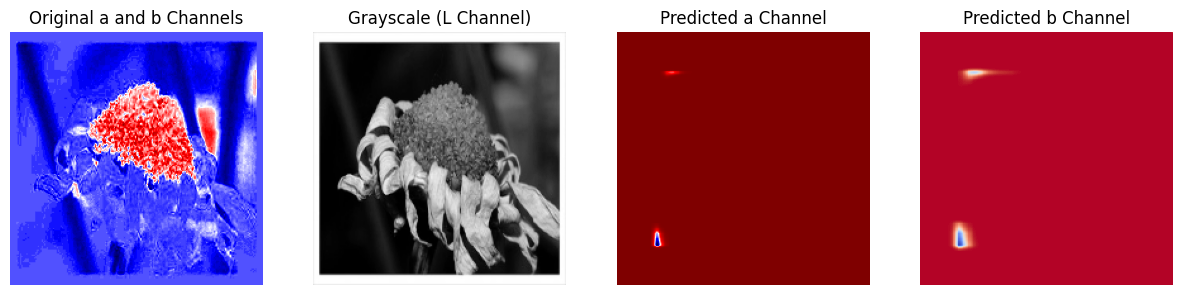

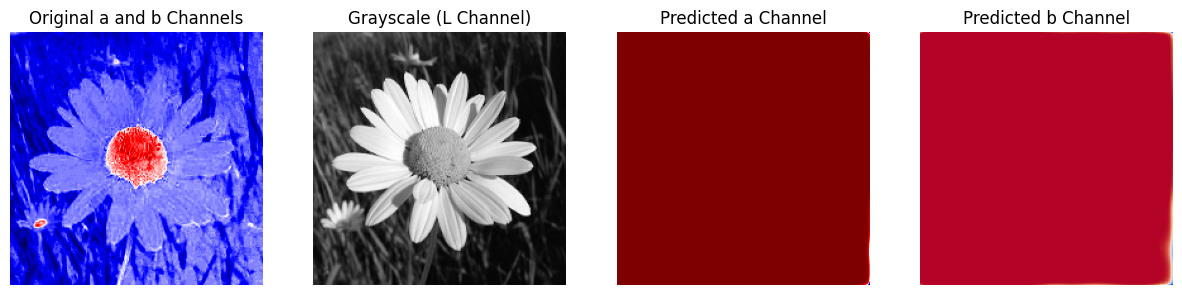

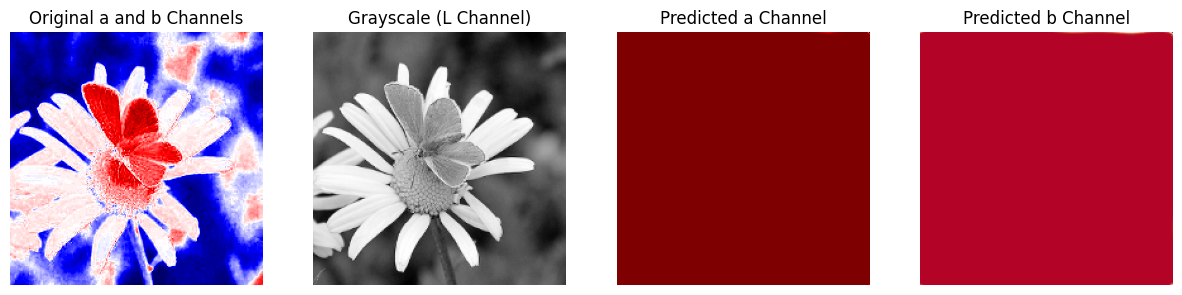

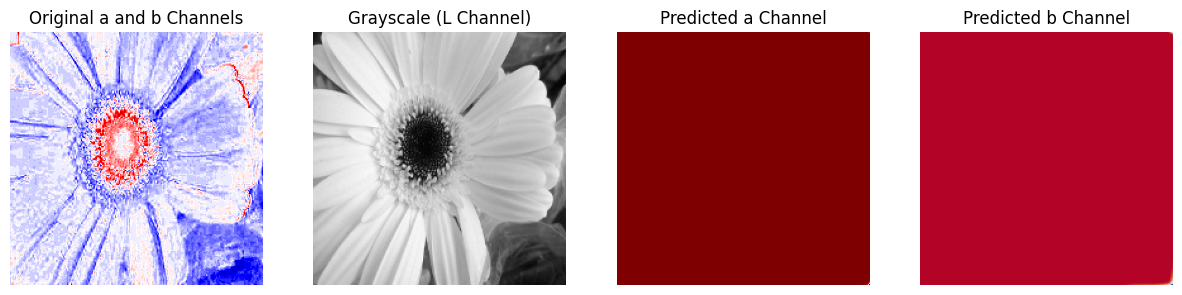

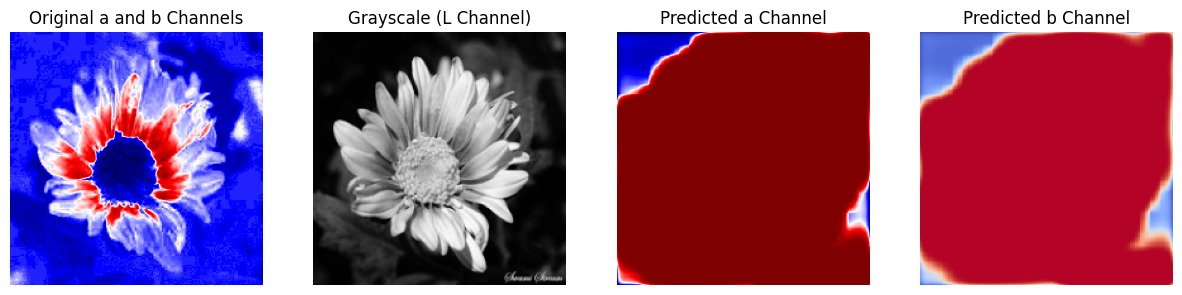

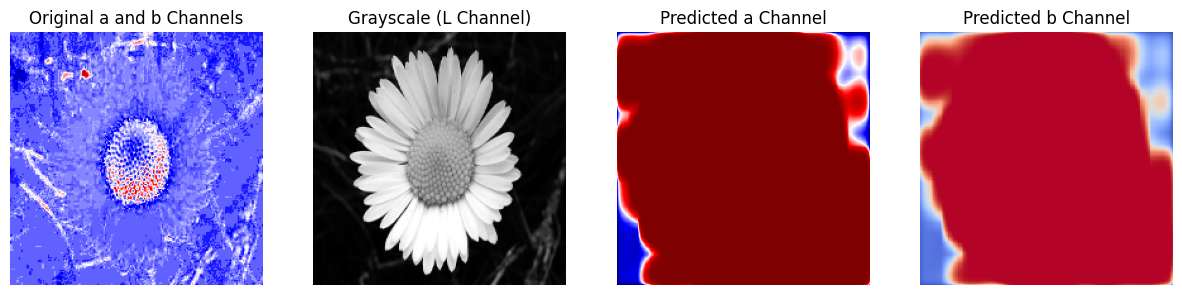

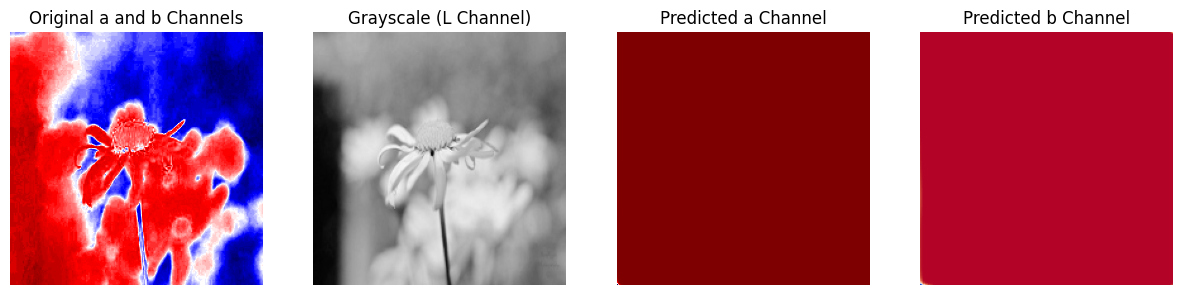

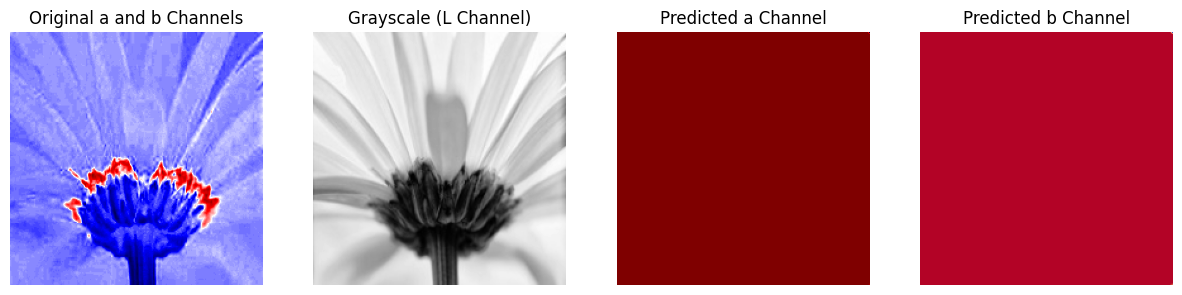

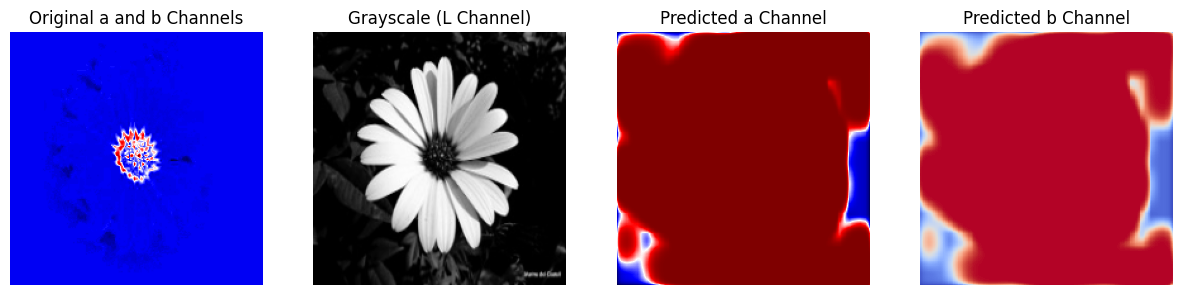

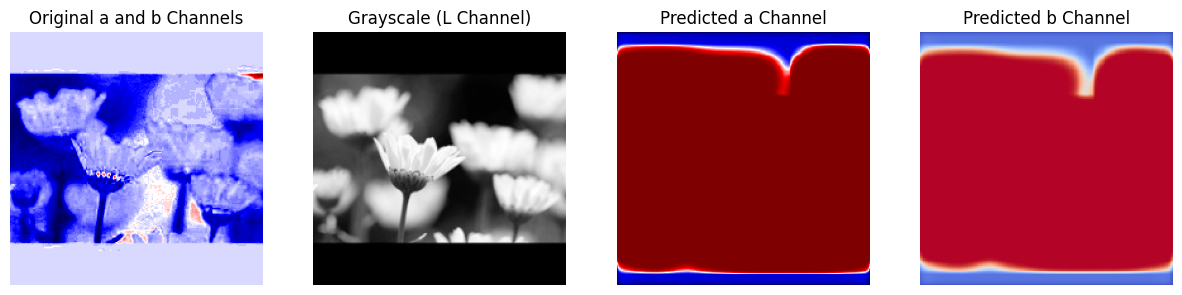

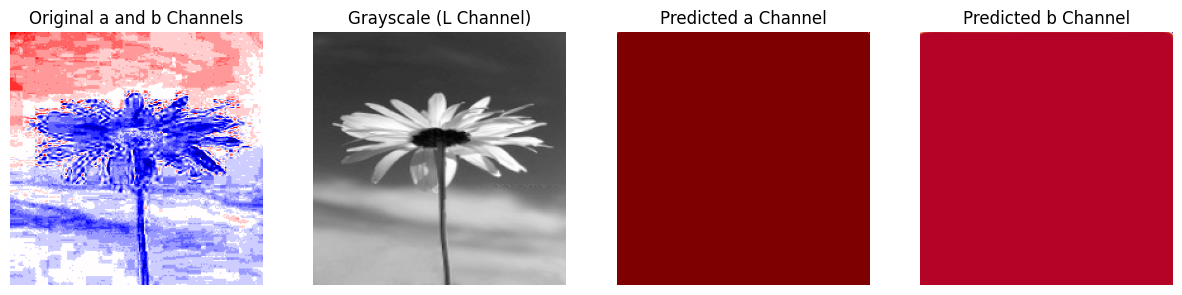

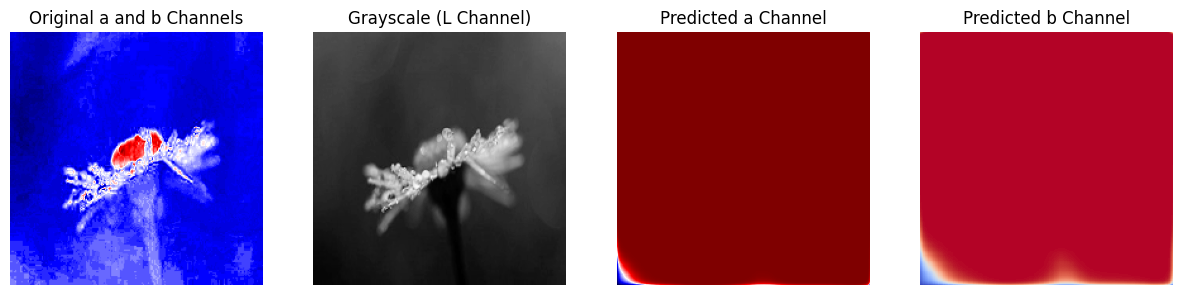

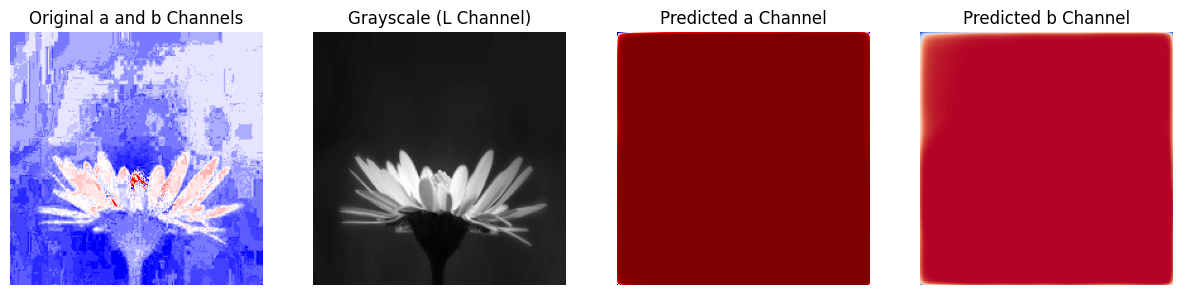

In [111]:
n = 15
predicted_images = autoencoder.predict(X_test[:n])

for i in range(n):
    plt.figure(figsize=(15, 5))


    plt.subplot(1, 4, 1)
    plt.title("Original a and b Channels")
    plt.imshow(Y_test[i][:, :, 0], cmap='seismic')  # Wyświetlenie kanału a
    plt.axis('off')


    plt.subplot(1, 4, 2)
    plt.title("Grayscale (L Channel)")
    plt.imshow(X_test[i].reshape(200, 200), cmap='gray')
    plt.axis('off')
    

    plt.subplot(1, 4, 3)
    plt.title("Predicted a Channel")
    plt.imshow(predicted_images[i][:, :, 0], cmap='seismic')  # Kanał a
    plt.axis('off')

 
    plt.subplot(1, 4, 4)
    plt.title("Predicted b Channel")
    plt.imshow(predicted_images[i][:, :, 1], cmap='coolwarm')  # Kanał b
    plt.axis('off')

    plt.show()


#### `Step 3.2: U-net.`

### `Step 4: Let's make our model perfect.`

#### `Step 4.1: Testing three (3) different optimizers.`

In [25]:
optimizers = {
    'Adam': Adam(learning_rate=0.001),
    'RMSprop': RMSprop(learning_rate=0.001),
    'SGD': SGD(learning_rate=0.01, momentum=0.9)  # With momentum for better convergence
}

results = {}

In [26]:
for name, optimizer in optimizers.items():
    print(f"\nTraining with {name} optimizer:")

    autoencoder = Model(inputs = input_layer, outputs = decoded)
    autoencoder.compile(
        optimizer = optimizer,
        loss = 'mse',
        metrics = [psnr_metric, ssim_metric]  
    )

    history = autoencoder.fit(
        X_train, Y_train,
        batch_size = batch_size,
        epochs = 5,
        validation_data=(X_val, Y_val),
        callbacks=[early_stopping],
        verbose = 1
    )

    val_loss, psnr, ssim = autoencoder.evaluate(X_val, Y_val, verbose=0)
    results[name] = {
        'Validation Loss': val_loss,
        'PSNR': psnr,
        'SSIM': ssim
    }    


Training with Adam optimizer:
Epoch 1/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 59s 3s/step - loss: 0.0443 - psnr_metric: 14.7152 - ssim_metric: 0.4563 - val_loss: 0.0248 - val_psnr_metric: 16.5833 - val_ssim_metric: 0.5013
Epoch 2/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 54s 3s/step - loss: 0.0231 - psnr_metric: 16.8671 - ssim_metric: 0.5011 - val_loss: 0.0202 - val_psnr_metric: 17.5547 - val_ssim_metric: 0.5333
Epoch 3/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 54s 3s/step - loss: 0.0188 - psnr_metric: 17.9287 - ssim_metric: 0.5437 - val_loss: 0.0187 - val_psnr_metric: 17.9847 - val_ssim_metric: 0.5496
Epoch 4/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 54s 3s/step - loss: 0.0170 - psnr_metric: 18.3442 - ssim_metric: 0.5628 - val_loss: 0.0175 - val_psnr_metric: 18.3288 - val_ssim_metric: 0.5771
Epoch 5/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 52s 3s/step - loss: 0.0163 - psnr_metric: 18.5490 - ssim_metric: 0.5799 - val_loss: 0.0170 - val_psnr_metric: 18.5015 - val_ssim_metric: 0.5912

Training with RMSprop optimizer:
Epoch 1/5
17/17 ━━━━━━━━━━━━━━

In [27]:
print("\nComparison of Optimizers:")
for name, metrics in results.items():
    print(f"{name} - Validation Loss: {metrics['Validation Loss']:.4f}, PSNR: {metrics['PSNR']:.2f}, SSIM: {metrics['SSIM']:.4f}")


Comparison of Optimizers:
Adam - Validation Loss: 0.0170, PSNR: 18.50, SSIM: 0.5912
RMSprop - Validation Loss: 0.0213, PSNR: 17.31, SSIM: 0.5614
SGD - Validation Loss: 0.0180, PSNR: 18.19, SSIM: 0.5778


In [31]:
table_data = [
    [optimizer, metrics["Validation Loss"], metrics["PSNR"], metrics["SSIM"]]
    for optimizer, metrics in results.items()
]

table = tabulate(
    table_data,
    headers=["Optimizer", "Validation Loss", "PSNR", "SSIM"],
    tablefmt="grid"
)

print("\nComparison of Optimizers:")
print(table)


Comparison of Optimizers:
+-------------+-------------------+---------+----------+
| Optimizer   |   Validation Loss |    PSNR |     SSIM |
+=============+===================+=========+==========+
| Adam        |         0.0170169 | 18.5015 | 0.591187 |
+-------------+-------------------+---------+----------+
| RMSprop     |         0.0213206 | 17.3111 | 0.561364 |
+-------------+-------------------+---------+----------+
| SGD         |         0.0179742 | 18.1918 | 0.577785 |
+-------------+-------------------+---------+----------+


#### `Step 4.2: Testing three (3) different loss functions.`

In [33]:
def ssim_loss(y_true, y_pred):
    return 1 - tf.reduce_mean(tf.image.ssim(y_true, y_pred, max_val=1.0))

In [34]:
def train_model_with_loss(loss_function, loss_name):
    print(f"\nTraining model with {loss_name} loss...")
    autoencoder = Model(inputs=input_layer, outputs=decoded)
    autoencoder.compile(optimizer=Adam(), loss=loss_function, metrics=[psnr_metric, ssim_metric])

    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    history = autoencoder.fit(
        X_train, Y_train,
        batch_size=batch_size,
        epochs=5,
        validation_data=(X_val, Y_val),
        callbacks=[early_stopping],
        verbose=0
    )
    
    val_results = autoencoder.evaluate(X_val, Y_val, verbose=0)
    return {"Validation Loss": val_results[0], "PSNR": val_results[1], "SSIM": val_results[2]}


In [35]:
loss_results = {}

loss_functions = {
    "Mean Squared Error (MSE)": MeanSquaredError(),
    "Mean Absolute Error (MAE)": MeanAbsoluteError(),
    "Structural Similarity Index (SSIM) Loss": ssim_loss
}

for loss_name, loss_fn in loss_functions.items():
    loss_results[loss_name] = train_model_with_loss(loss_fn, loss_name)



Training model with Mean Squared Error (MSE) loss...

Training model with Mean Absolute Error (MAE) loss...

Training model with Structural Similarity Index (SSIM) Loss loss...

### Loss Function Comparison:

| Loss Function                           |   Validation Loss |    PSNR |     SSIM |
|:----------------------------------------|------------------:|--------:|---------:|
| Mean Squared Error (MSE)                |         0.0162716 | 18.74   | 0.602815 |
| Mean Absolute Error (MAE)               |         0.083721  | 19.0205 | 0.647739 |
| Structural Similarity Index (SSIM) Loss |         0.344917  | 19.2228 | 0.729718 |


In [37]:
table_data = [
    [optimizer, metrics["Validation Loss"], metrics["PSNR"], metrics["SSIM"]]
    for optimizer, metrics in loss_results.items()
]

# Create the table with tabulate
table = tabulate(
    table_data,
    headers=["Optimizer", "Validation Loss", "PSNR", "SSIM"],
    tablefmt="grid"
)

# Print the result
print("\nComparison of Optimizers:")
print(table)


Comparison of Optimizers:
+-----------------------------------------+-------------------+---------+----------+
| Optimizer                               |   Validation Loss |    PSNR |     SSIM |
+=========================================+===================+=========+==========+
| Mean Squared Error (MSE)                |         0.0162716 | 18.74   | 0.602815 |
+-----------------------------------------+-------------------+---------+----------+
| Mean Absolute Error (MAE)               |         0.083721  | 19.0205 | 0.647739 |
+-----------------------------------------+-------------------+---------+----------+
| Structural Similarity Index (SSIM) Loss |         0.344917  | 19.2228 | 0.729718 |
+-----------------------------------------+-------------------+---------+----------+


#### `Step 4.3: Hyperparameter tuning or estimation.`

Training with lr=1.4174088852014156e-05, batch_size=25, epochs=5...
Training with lr=0.00030636080503457794, batch_size=16, epochs=5...
Training with lr=0.0014069149639841655, batch_size=28, epochs=10...
Training with lr=0.00030636080503457794, batch_size=16, epochs=10...


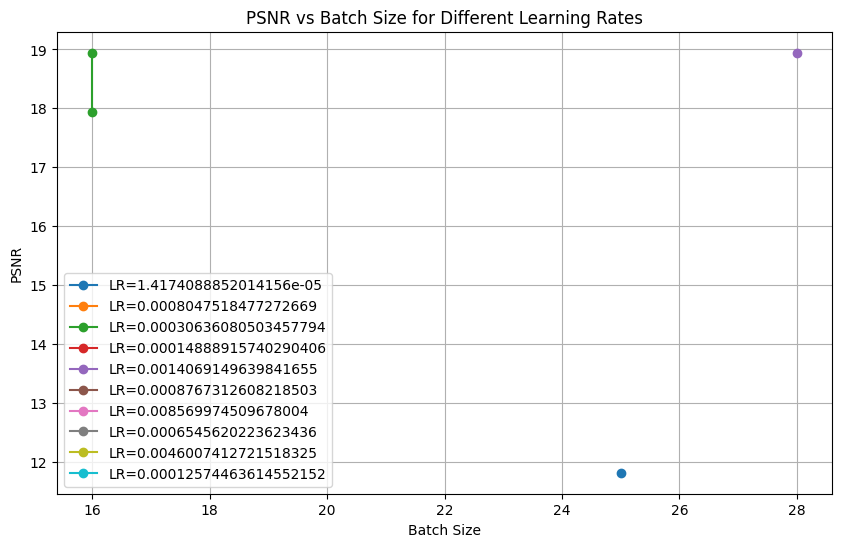

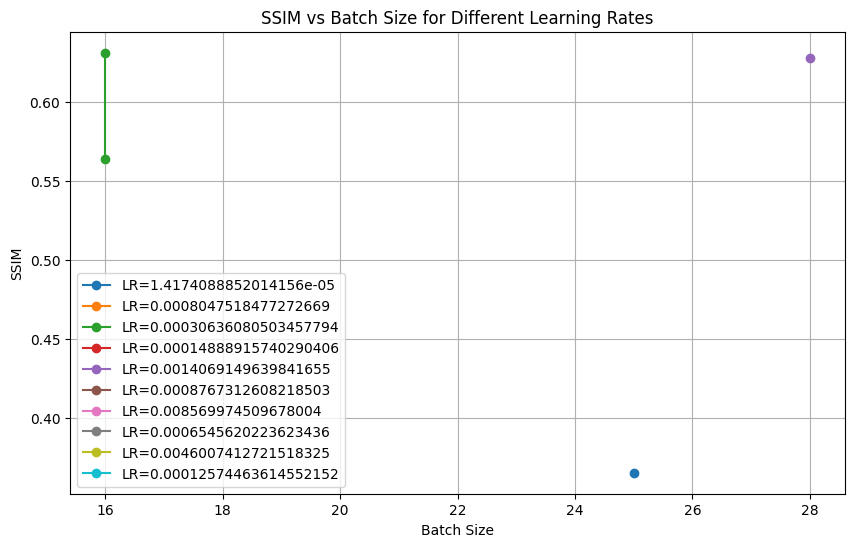

In [41]:
learning_rates = [10**random.uniform(-5, -2) for _ in range(10)]
batch_sizes = [random.randint(16, 64) for _ in range(10)]
epochs_range = (5, 50)

def train_model_with_params(learning_rate, batch_size, epochs):
    
    input_layer = Input(shape=input_shape)
    encoded = build_encoder(input_layer)
    decoded = build_decoder(encoded)
    
    autoencoder = Model(inputs=input_layer, outputs=decoded)
    autoencoder.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse', metrics=[psnr_metric, ssim_metric])
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    
    
    history = autoencoder.fit(
        X_train, Y_train,
        batch_size=batch_size,
        epochs=epochs,
        validation_data=(X_val, Y_val),
        callbacks=[early_stopping],
        verbose=0
    )
    
    
    val_loss, psnr, ssim = autoencoder.evaluate(X_val, Y_val, verbose=0)
    
    return psnr, ssim

results = []


for _ in range(4):  
    lr = random.choice(learning_rates)
    bs = random.choice(batch_sizes)
    ep = random.choice(epochs)
    
    print(f"Training with lr={lr}, batch_size={bs}, epochs={ep}...")
    psnr, ssim = train_model_with_params(lr, bs, ep)
    results.append((lr, bs, ep, psnr, ssim))


df = pd.DataFrame(results, columns=['Learning Rate', 'Batch Size', 'Epochs', 'PSNR', 'SSIM'])


plt.figure(figsize=(10, 6))
for lr in learning_rates:
    subset = df[df['Learning Rate'] == lr]
    plt.plot(subset['Batch Size'], subset['PSNR'], label=f'LR={lr}', marker='o')

plt.title('PSNR vs Batch Size for Different Learning Rates')
plt.xlabel('Batch Size')
plt.ylabel('PSNR')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
for lr in learning_rates:
    subset = df[df['Learning Rate'] == lr]
    plt.plot(subset['Batch Size'], subset['SSIM'], label=f'LR={lr}', marker='o')

plt.title('SSIM vs Batch Size for Different Learning Rates')
plt.xlabel('Batch Size')
plt.ylabel('SSIM')
plt.legend()
plt.grid(True)
plt.show()


#### `Step 4.4: Cross-validation.`

In [43]:
k = 5  
kf = KFold(n_splits=k, shuffle=True, random_state=42)

cv_results = []

for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    Y_train_fold, Y_val_fold = Y_train[train_index], Y_train[val_index]

    input_layer = Input(shape=input_shape)
    encoded = build_encoder(input_layer)
    decoded = build_decoder(encoded)

    autoencoder = Model(inputs=input_layer, outputs=decoded)
    autoencoder.compile(optimizer=Adam(), loss='mse', metrics=[psnr_metric, ssim_metric])
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    history = autoencoder.fit(
        X_train_fold, Y_train_fold,
        batch_size=32,
        epochs=5,
        validation_data=(X_val_fold, Y_val_fold),
        callbacks=[early_stopping],
        verbose=0
    )

    val_loss, psnr, ssim = autoencoder.evaluate(X_val_fold, Y_val_fold, verbose=0)
    cv_results.append((val_loss, psnr, ssim))

cv_results = np.array(cv_results)
avg_val_loss = np.mean(cv_results[:, 0])
avg_psnr = np.mean(cv_results[:, 1])
avg_ssim = np.mean(cv_results[:, 2])

print(f"Average Validation Loss: {avg_val_loss:.4f}")
print(f"Average PSNR: {avg_psnr:.4f}")
print(f"Average SSIM: {avg_ssim:.4f}")


Average Validation Loss: 0.0195
Average PSNR: 17.7466
Average SSIM: 0.5350


### `Step 5: Final training.`

In [ ]:
# autoencoder.save("./model.keras")